*******
<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#bdd6f5;overflow:hidden;font-weight:500">Prédiction de la consommation d'énergie des bâtiments publiques à Seattle</div>

*******

### Tables des matières<a class="anchor" id="retour"></a>

[Présentation du projet](#Présentation)


* [Partie 1 🛠 Nettoyage & analyse exploratoire des donnéés](#Partie_1)

    * [1.1 Télechargement et visualisation des données](#Section_1.1)
    * [1.2 Gestion des valeurs nulles](#Section_1.2)
    * [1.3 Consommation d'énergie par type de bâtiment](#Section_1.3)
    * [1.4 Consommation d'énergie par années d'anciennetés](#Section_1.4)
    * [1.5 Consommation d'énergie par type de bâtiment (dispersion)](#Section_1.5)
    * [1.6 Consommation d'énergie en fonction du lieu géographique](#Section_1.6)
    * [1.7 Colinéarité entre les variables](#Section_1.7)
    * [1.8 Création des DF pour le Machine Learning](#Section_1.8)

[Références](#Références)

## Présentation du projet



****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Partie 1 🛠 Nettoyage des données</div>
<a class="anchor" id="Partie_1"></a>

****

In [224]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [225]:
# Importation des données
df=pd.read_csv("../data/data.csv",sep=",")

In [226]:
df.shape

(3376, 46)

In [227]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [228]:
df.describe(include="all")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [230]:
# Suppression des variables inutiles
df=df.drop(columns=["DataYear","Comments","City","State"])

In [231]:
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [232]:
# Mise en forme générale : toutes les modalités sont en minuscules
liste = df.columns[df.dtypes=="object"]
for i in liste:
    df[i]=df[i].str.lower()

## Gestion des valeurs nulles

<AxesSubplot: >

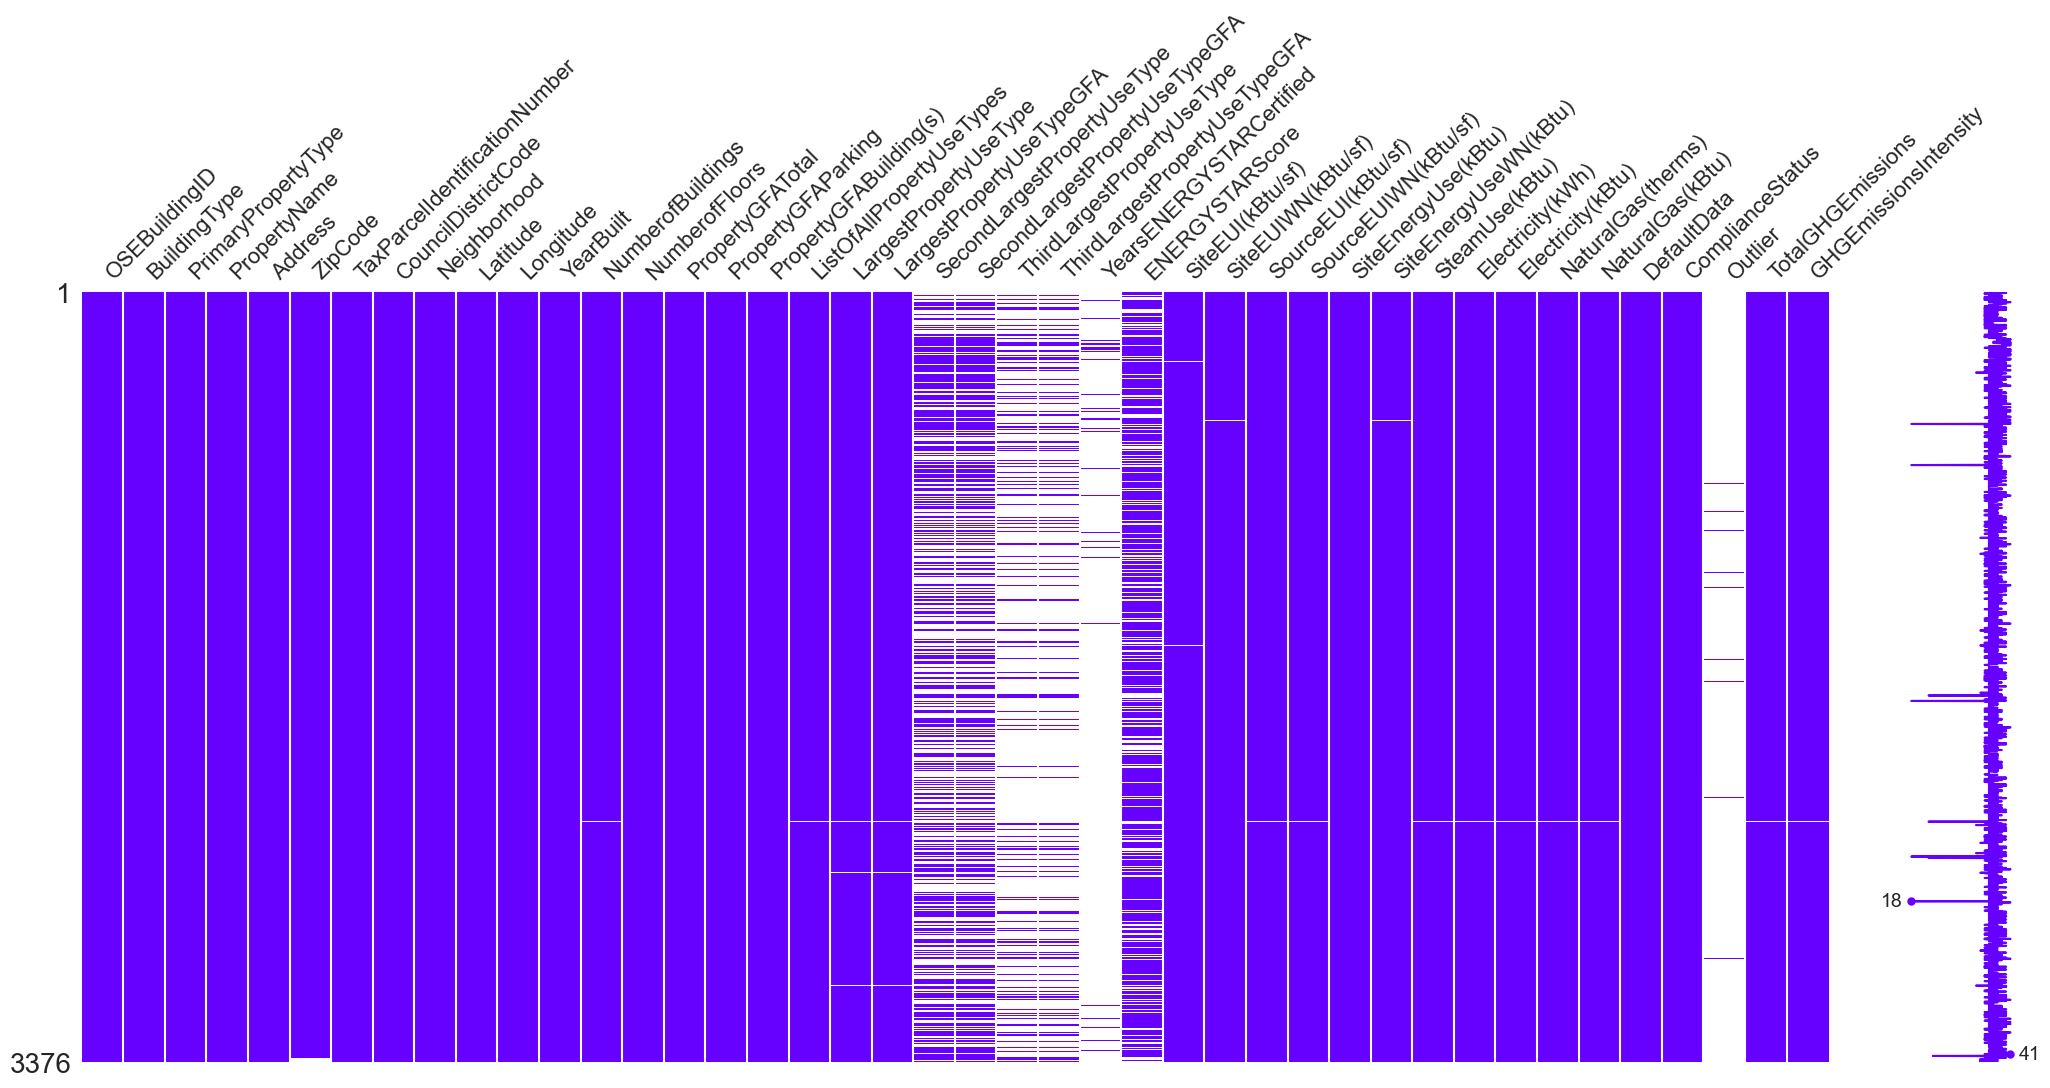

In [233]:
# Graphique des valeurs nulles

import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

In [234]:
df=df.dropna(axis=0,subset="NumberofBuildings")
df=df.dropna(axis=0,subset="TotalGHGEmissions")

In [235]:
df["NumberofFloors"].value_counts()

3     690
4     686
1     466
2     438
6     306
5     295
7     148
8      64
10     32
11     32
12     21
13     21
9      18
0      16
14     13
17      9
16      7
24      7
18      7
15      7
23      7
19      6
26      6
42      6
33      6
20      5
27      5
21      5
25      5
22      4
29      3
41      3
37      2
34      2
31      2
36      2
28      2
32      1
39      1
76      1
38      1
99      1
55      1
56      1
30      1
46      1
63      1
49      1
47      1
40      1
Name: NumberofFloors, dtype: int64

(3034, 42)

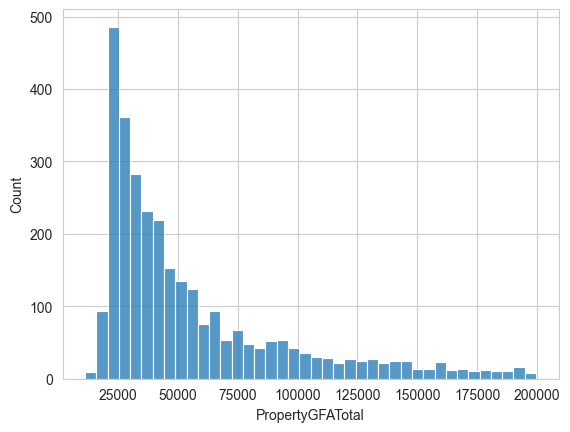

In [236]:
# df["PropertyGFATotal"]
sns.histplot(data=df[df['PropertyGFATotal']<200_000],x="PropertyGFATotal",bins=40)
df[df['PropertyGFATotal']<200_000].shape

<AxesSubplot: xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

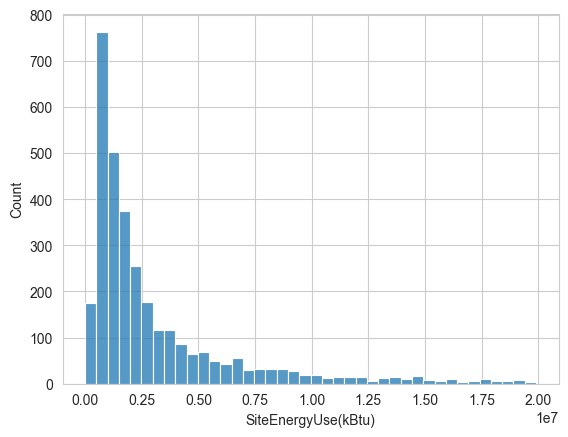

In [237]:
sns.histplot(data=df[df["SiteEnergyUse(kBtu)"]<20_000_000],x="SiteEnergyUse(kBtu)",bins=40)

In [238]:
len(df[df["SiteEnergyUse(kBtu)"]<250_000_000])

3361

In [239]:
df.shape

(3367, 42)

<AxesSubplot: xlabel='NumberofFloors', ylabel='Count'>

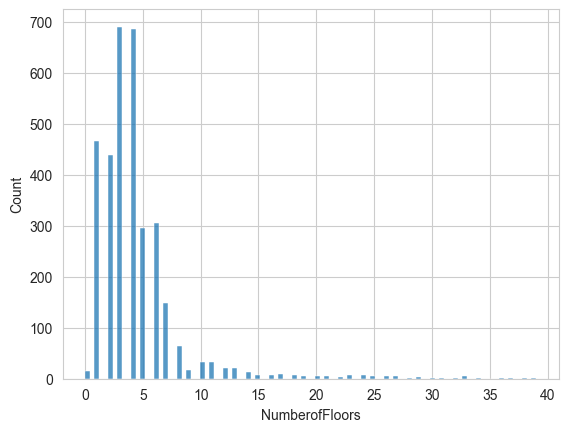

In [240]:
sns.histplot(data=df[df["NumberofFloors"]<40],x="NumberofFloors")

In [241]:
df["NumberofBuildings"].value_counts()

1.0      3174
0.0        92
2.0        37
3.0        22
4.0        12
5.0        10
6.0         5
8.0         3
10.0        2
14.0        2
9.0         2
7.0         1
11.0        1
16.0        1
23.0        1
27.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

<AxesSubplot: xlabel='NumberofBuildings', ylabel='Count'>

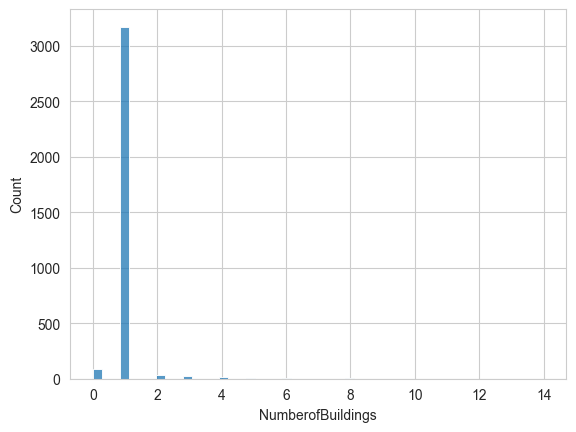

In [242]:
sns.histplot(data=df[df["NumberofBuildings"]<15],x="NumberofBuildings",bins=50)

In [243]:
df["Outlier"].value_counts()

low outlier     23
high outlier     9
Name: Outlier, dtype: int64

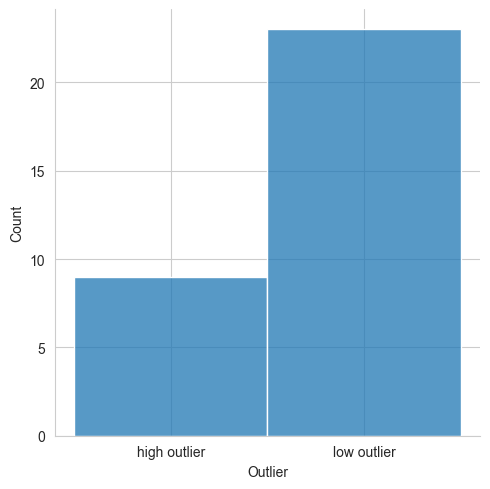

In [244]:
sns.displot(df, x="Outlier", binwidth=3)

In [245]:
df.YearsENERGYSTARCertified.isnull().sum()

3248

In [246]:
# Suppression de la colonne Outlier
df = df.drop(columns=["Outlier","YearsENERGYSTARCertified"])

In [247]:
df[["SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA"]]

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
0,NaN,NaN
1,parking,15064.0
2,NaN,NaN
3,NaN,NaN
4,parking,68009.0
...,...,...
3371,NaN,NaN
3372,NaN,NaN
3373,fitness center/health club/gym,5574.0
3374,fitness center/health club/gym,6501.0


In [248]:
len(df.SecondLargestPropertyUseType.unique())

51

In [249]:
# Remplacement des valeurs nulles des 2 colonnes par 0

df.loc[df["SecondLargestPropertyUseTypeGFA"].isnull(), 'SecondLargestPropertyUseTypeGFA'] = 0
df.loc[df["ThirdLargestPropertyUseTypeGFA"].isnull(), 'ThirdLargestPropertyUseTypeGFA'] = 0

In [250]:
len(df["Address"].unique())

3344

In [251]:
# Affichages des doublons de la variable adresse
df[df.Address.duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
136,224,nonresidential,retail store,westwood village - building b,2600 sw barton st,98126.0,3624039009,1,delridge,47.52254,...,9.589728e+06,0.0,7.690803e+05,2.624102e+06,66061.210940,6606121.0,False,compliant,369.14,5.45
157,248,nonresidential cos,warehouse,scl ssc building b,3613 4th ave s,98134.0,7666205660,2,greater duwamish,47.57199,...,4.327564e+06,0.0,1.151435e+06,3.928695e+06,0.000000,0.0,False,compliant,27.39,0.47
349,491,nonresidential,small- and mid-sized office,south tower,100 west harrison,98119.0,1989200740,7,magnolia / queen anne,47.62224,...,3.705629e+06,0.0,1.023767e+06,3.493093e+06,0.000000,0.0,False,compliant,24.35,0.28
415,574,nonresidential,retail store,(71371a) northgate macy's,401 ne northgate way,98125.0,2926049272,5,north,47.70759,...,7.783388e+06,0.0,1.638420e+06,5.590290e+06,17005.341800,1700534.0,False,compliant,129.29,0.43
582,779,nonresidential,large office,administration building,500 5th ave,98104.0,0942000920,7,downtown,47.60290,...,1.616201e+07,4047481.0,3.289862e+06,1.122501e+07,0.000000,0.0,False,compliant,390.67,1.74
587,785,nonresidential cos,other,airport way ctr - bldg a,2203 airport way s,98134.0,7666203240,2,greater duwamish,47.58290,...,1.452216e+07,0.0,3.741538e+06,1.276613e+07,17030.980470,1703098.0,False,compliant,179.45,1.81
697,19654,nonresidential,laboratory,1100 olive lab,1100 olive way,98101.0,0660002030,7,downtown,47.61597,...,7.251589e+06,0.0,2.125319e+06,7.251588e+06,0.000000,0.0,False,compliant,50.55,1.13
1436,21794,nonresidential,k-12 school,peyton,2400 11th ave east,98102.0,2025049007,3,east,47.64132,...,2.699616e+06,0.0,3.706718e+05,1.264732e+06,12133.129880,1213313.0,False,compliant,73.26,1.68
1923,23835,nonresidential,small- and mid-sized office,south seattle business park - bldg b,4636 east marginal way south,98134.0,3573200250,2,greater duwamish,47.56121,...,1.175915e+06,0.0,3.178645e+05,1.084554e+06,0.000000,0.0,False,compliant,7.56,0.32
1969,23975,nonresidential cos,warehouse,airport way ctr - bldg d,2203 airport way s,98134.0,7666203240,2,greater duwamish,47.58290,...,8.593872e+05,0.0,1.212340e+05,4.136500e+05,3504.440186,350444.0,False,compliant,21.50,0.94


In [252]:
df[df.duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity


In [253]:
# Création d'un df constitué uniquement des "float"
df_float = df.select_dtypes(include=['float64','int64'])

In [254]:
df_float.columns

Index(['OSEBuildingID', 'ZipCode', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3367 entries, 0 to 3375
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3367 non-null   int64  
 1   BuildingType                     3367 non-null   object 
 2   PrimaryPropertyType              3367 non-null   object 
 3   PropertyName                     3367 non-null   object 
 4   Address                          3367 non-null   object 
 5   ZipCode                          3351 non-null   float64
 6   TaxParcelIdentificationNumber    3367 non-null   object 
 7   CouncilDistrictCode              3367 non-null   int64  
 8   Neighborhood                     3367 non-null   object 
 9   Latitude                         3367 non-null   float64
 10  Longitude                        3367 non-null   float64
 11  YearBuilt                        3367 non-null   int64  
 12  NumberofBuildings   

In [256]:
df.PropertyGFATotal

0        88434
1       103566
2       956110
3        61320
4       175580
         ...  
3371     12294
3372     16000
3373     13157
3374     14101
3375     18258
Name: PropertyGFATotal, Length: 3367, dtype: int64

In [257]:
df.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [258]:
df=df.astype({"ZipCode":str,"CouncilDistrictCode":str})

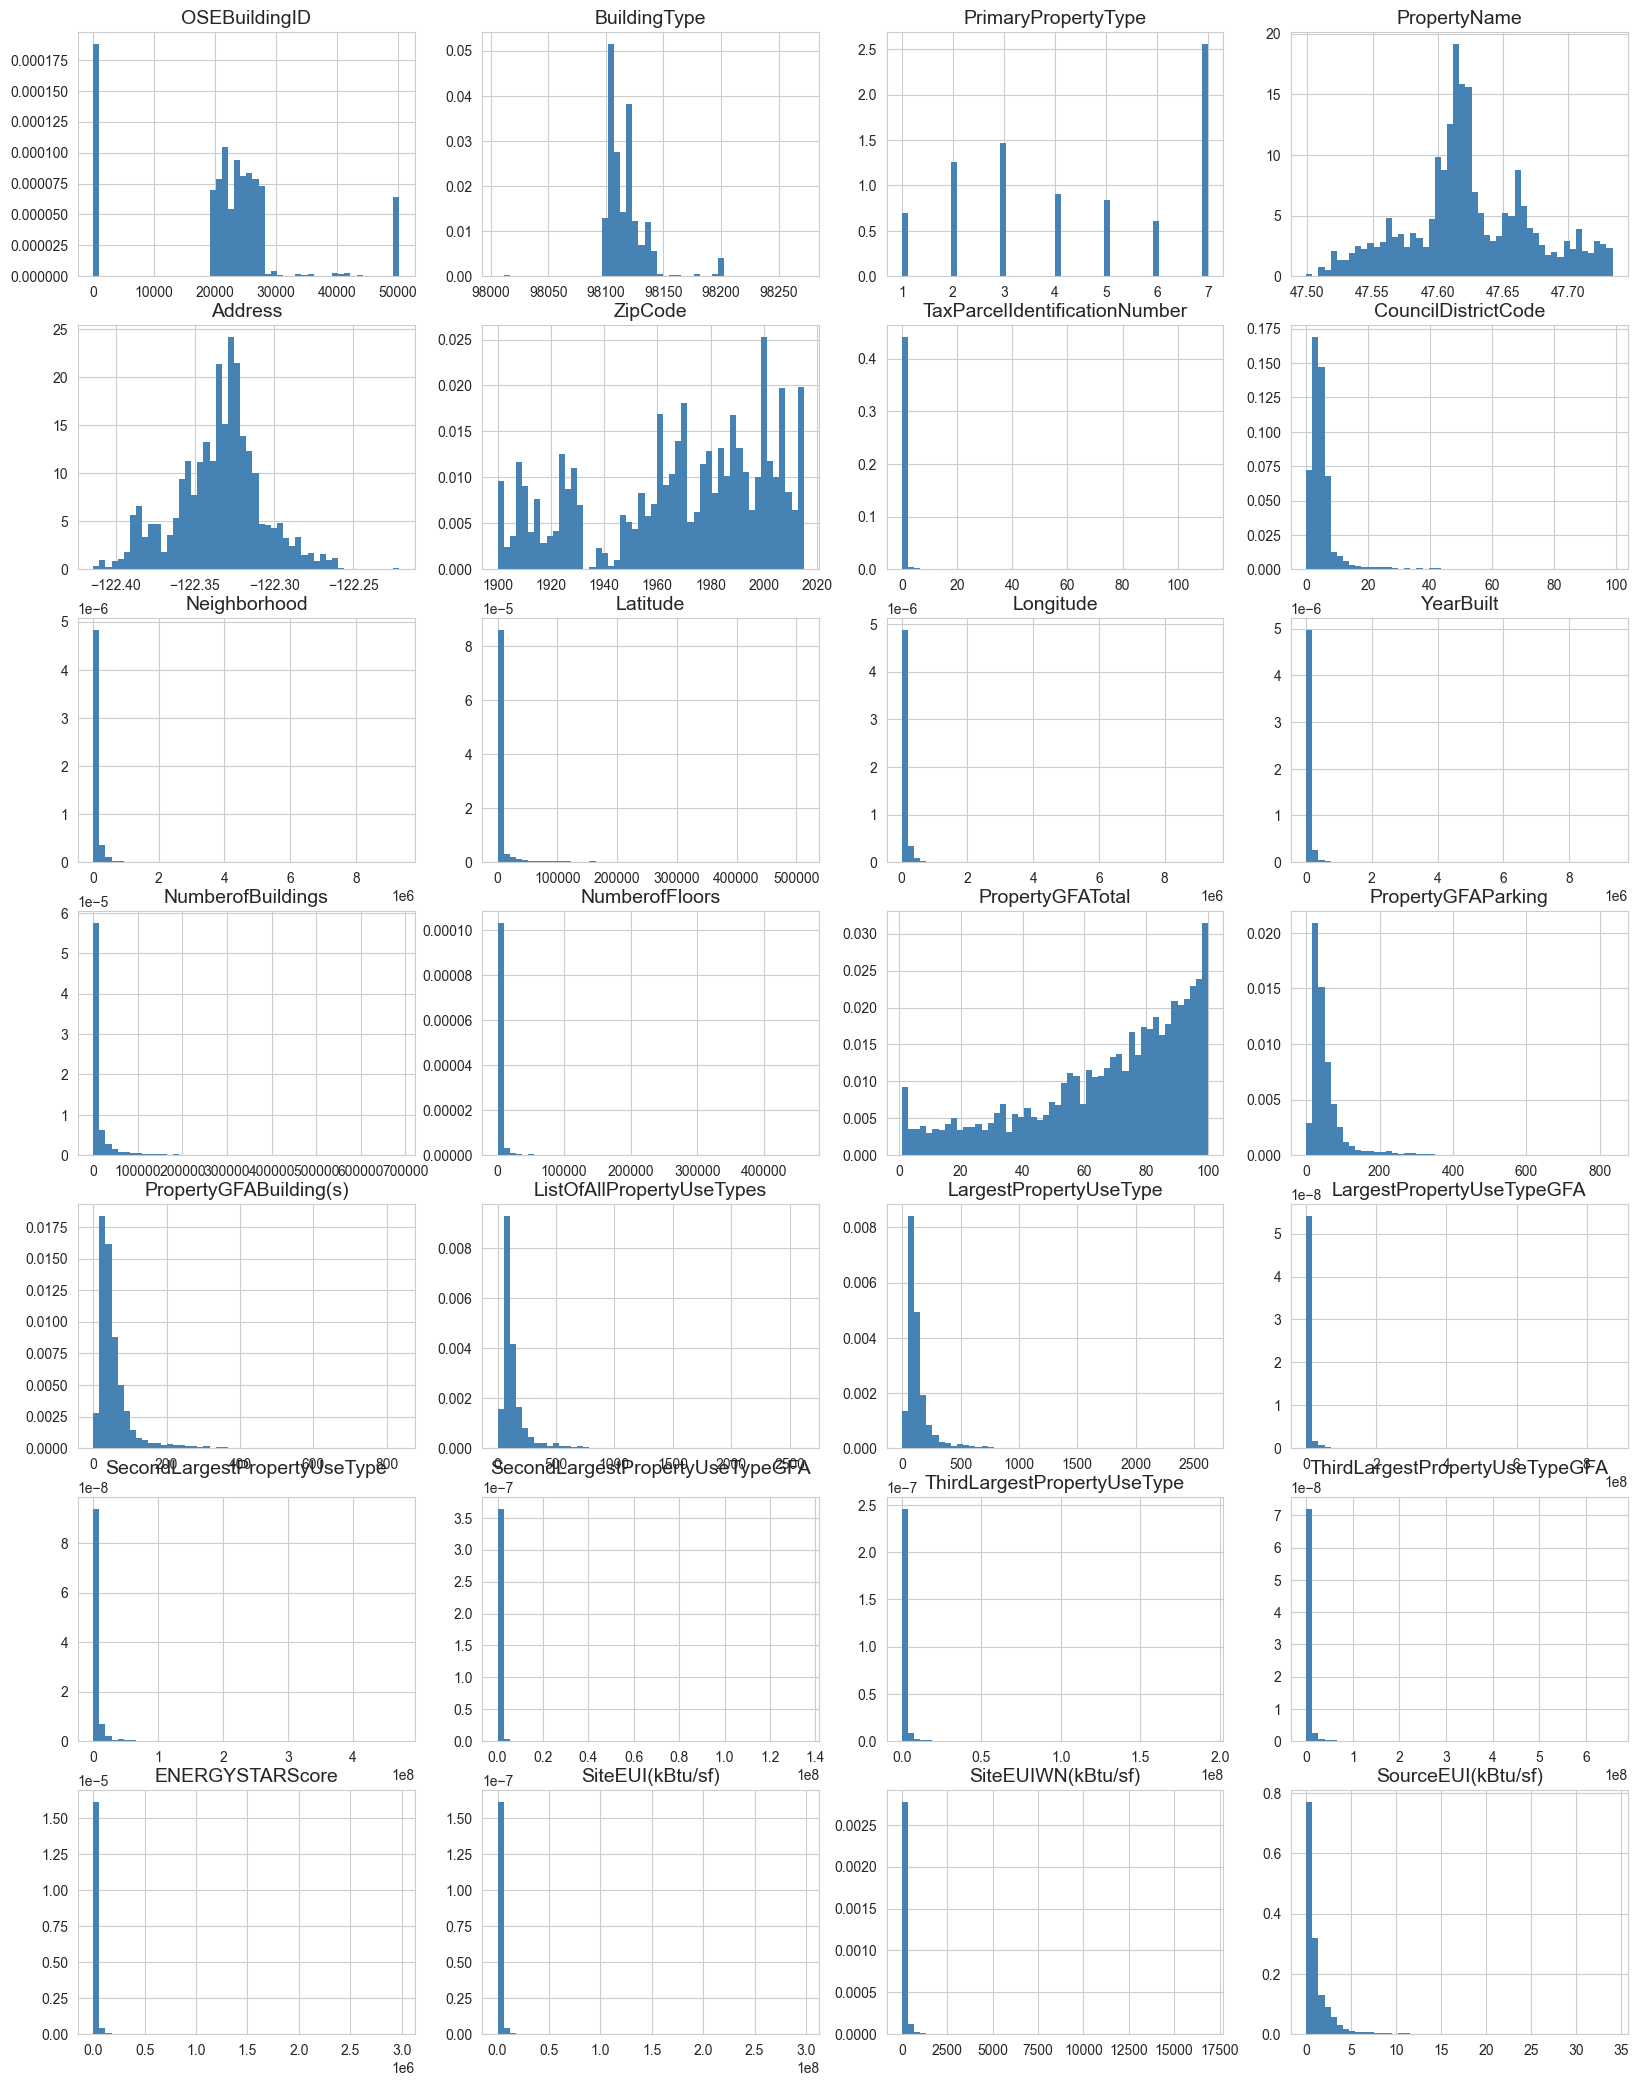

In [259]:
# Histogramme des variables numériques

X = df_float.values
fig = plt.figure(figsize=(20, 26))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(7,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df.columns[feat_idx], fontsize=14)

In [260]:
df.BuildingType.unique()

array(['nonresidential', 'nonresidential cos', 'multifamily mr (5-9)',
       'sps-district k-12', 'campus', 'multifamily lr (1-4)',
       'multifamily hr (10+)', 'nonresidential wa'], dtype=object)

In [261]:
df_objet = df.select_dtypes(include='object')

In [262]:
df_objet

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus
0,nonresidential,hotel,mayflower park hotel,405 olive way,98101.0,0659000030,7,downtown,hotel,hotel,NaN,NaN,compliant
1,nonresidential,hotel,paramount hotel,724 pine street,98101.0,0659000220,7,downtown,"hotel, parking, restaurant",hotel,parking,restaurant,compliant
2,nonresidential,hotel,5673-the westin seattle,1900 5th avenue,98101.0,0659000475,7,downtown,hotel,hotel,NaN,NaN,compliant
3,nonresidential,hotel,hotel max,620 stewart st,98101.0,0659000640,7,downtown,hotel,hotel,NaN,NaN,compliant
4,nonresidential,hotel,warwick seattle hotel (id8),401 lenora st,98121.0,0659000970,7,downtown,"hotel, parking, swimming pool",hotel,parking,swimming pool,compliant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,nonresidential cos,office,horticulture building,1600 s dakota st,nan,1624049080,2,greater duwamish,office,office,NaN,NaN,error - correct default data
3372,nonresidential cos,other,international district/chinatown cc,719 8th ave s,nan,3558300000,2,downtown,other - recreation,other - recreation,NaN,NaN,compliant
3373,nonresidential cos,other,queen anne pool,1920 1st ave w,nan,1794501150,7,magnolia / queen anne,"fitness center/health club/gym, other - recrea...",other - recreation,fitness center/health club/gym,swimming pool,compliant
3374,nonresidential cos,mixed use property,south park community center,8319 8th ave s,nan,7883603155,1,greater duwamish,"fitness center/health club/gym, food service, ...",other - recreation,fitness center/health club/gym,pre-school/daycare,compliant


In [263]:
len(df.PropertyGFATotal.unique())

3186

## 1.3)  Consommation d'énergie par type de bâtiment

In [264]:
def diag_bar(df,var_1,var_2):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.barplot(data=df,x=var_1,y=var_2,color = 'b')
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

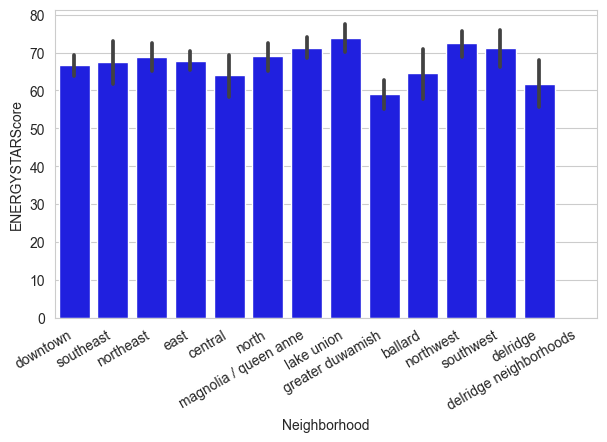

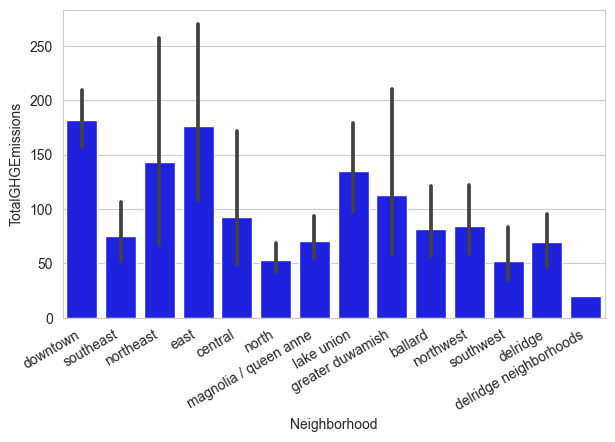

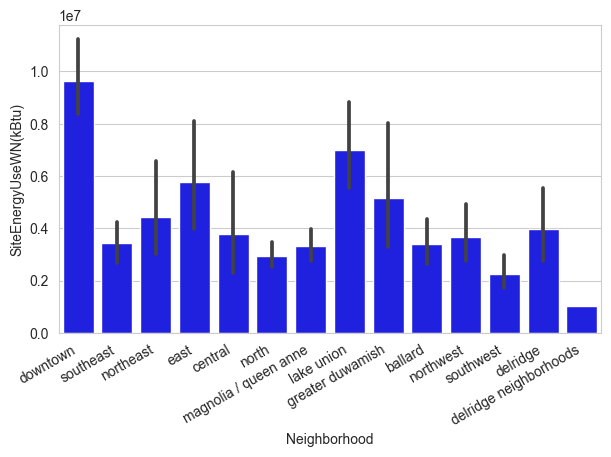

In [265]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"Neighborhood",list_var_num[num])

C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


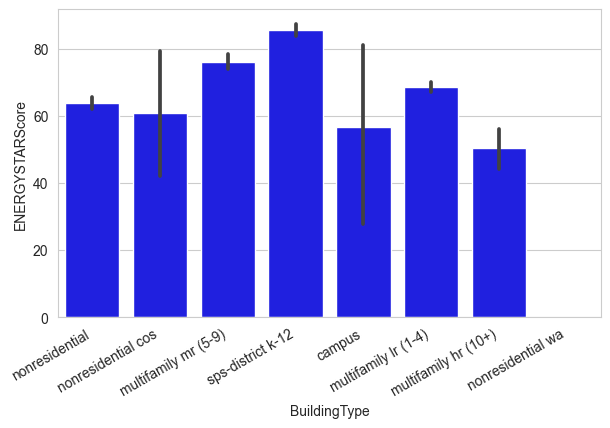

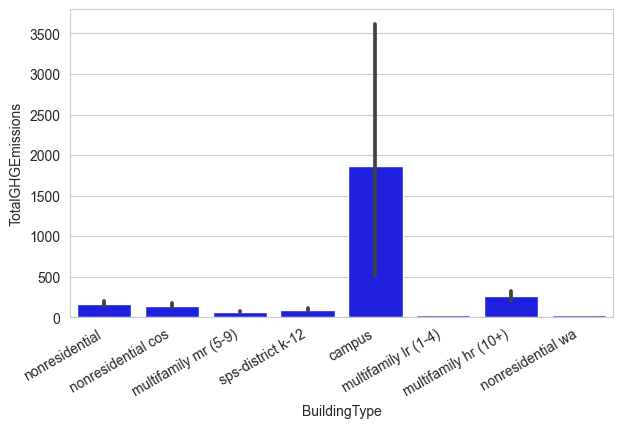

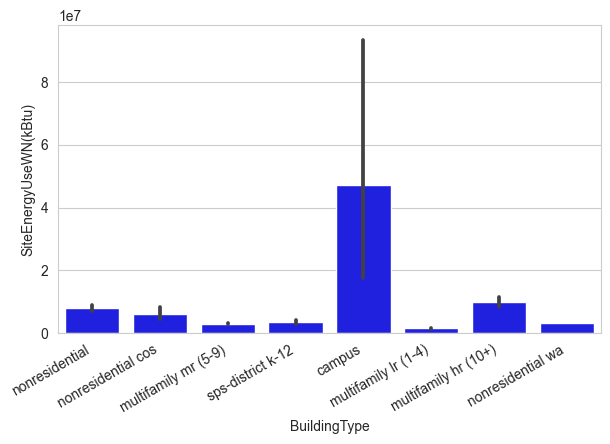

In [266]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"BuildingType",list_var_num[num])

C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN 

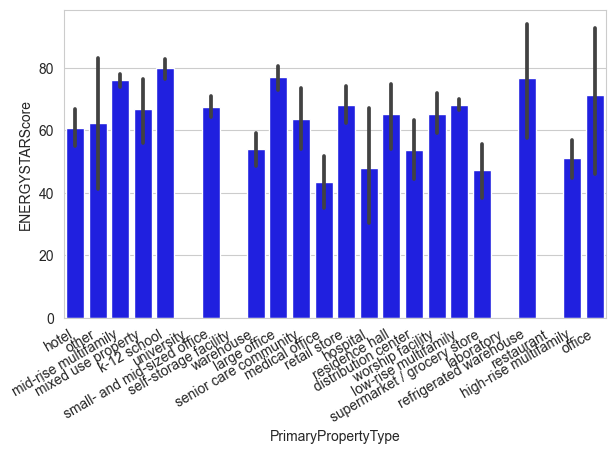

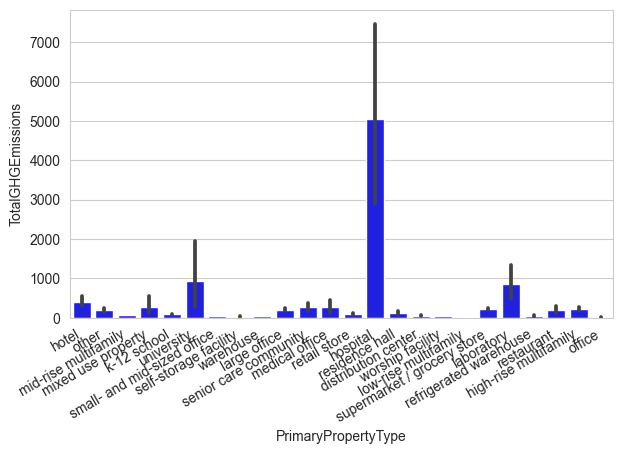

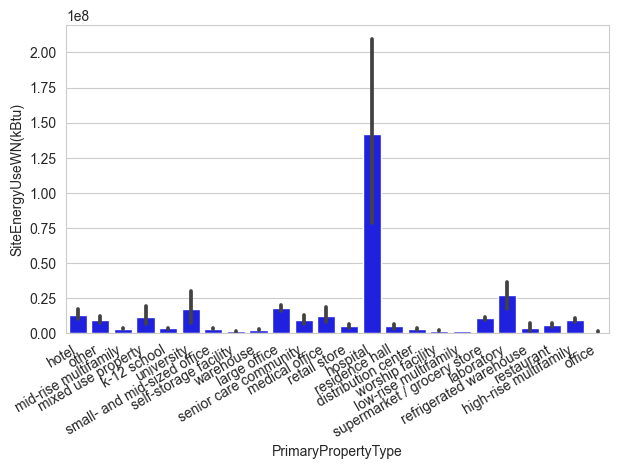

In [267]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"PrimaryPropertyType",list_var_num[num])

## 1.4) Consommation d'énergie  par année d'ancienneté

In [268]:
df["years"]=2016-df["YearBuilt"]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

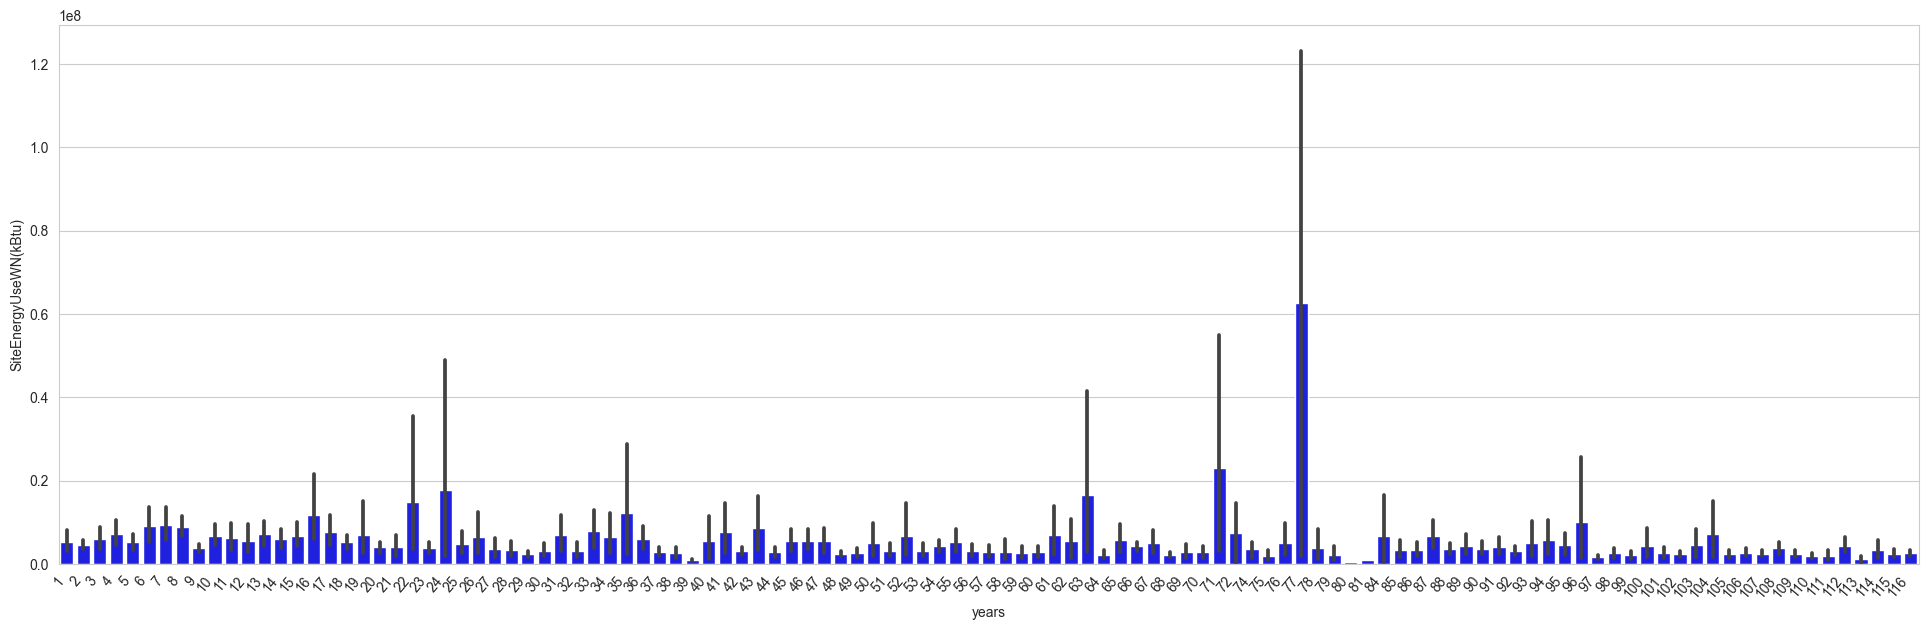

In [269]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.barplot(data=df,x="years",y="SiteEnergyUseWN(kBtu)",color = 'b')
plt.setp(ax.get_xticklabels(), rotation=50, ha="right")

Text(0.5, 1.0, "Evolution de la consommation d'énergie sur 6 ans")

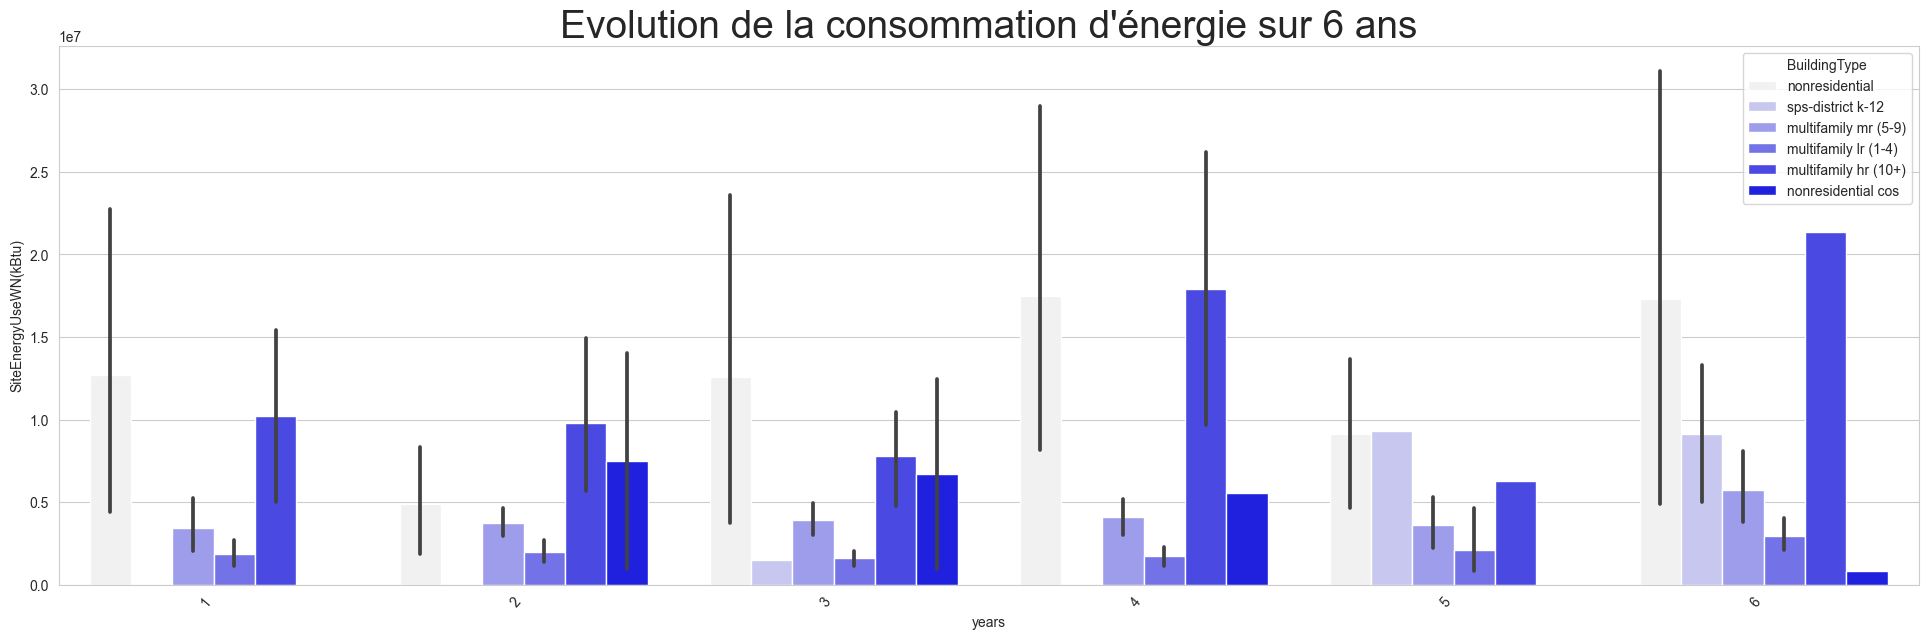

In [270]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.barplot(data=df[df["years"]<7],x="years",y="SiteEnergyUseWN(kBtu)",color = 'b',hue="BuildingType")
plt.setp(ax.get_xticklabels(), rotation=50, ha="right")
plt.title("Evolution de la consommation d'énergie sur 6 ans",fontsize=28)

## 1.5) Consommation d'énergie par type de bâtiment (dispersion)

In [271]:
# Filtre sur les bâtiments ayant une surconsommation
df[df["SiteEnergyUseWN(kBtu)"]>10_000_000].shape

(354, 41)

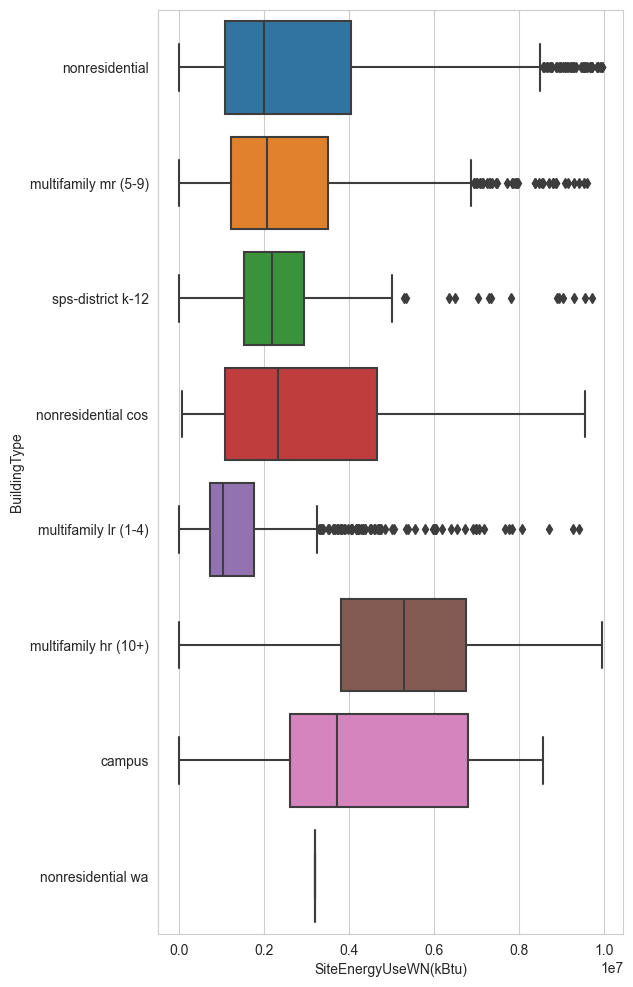

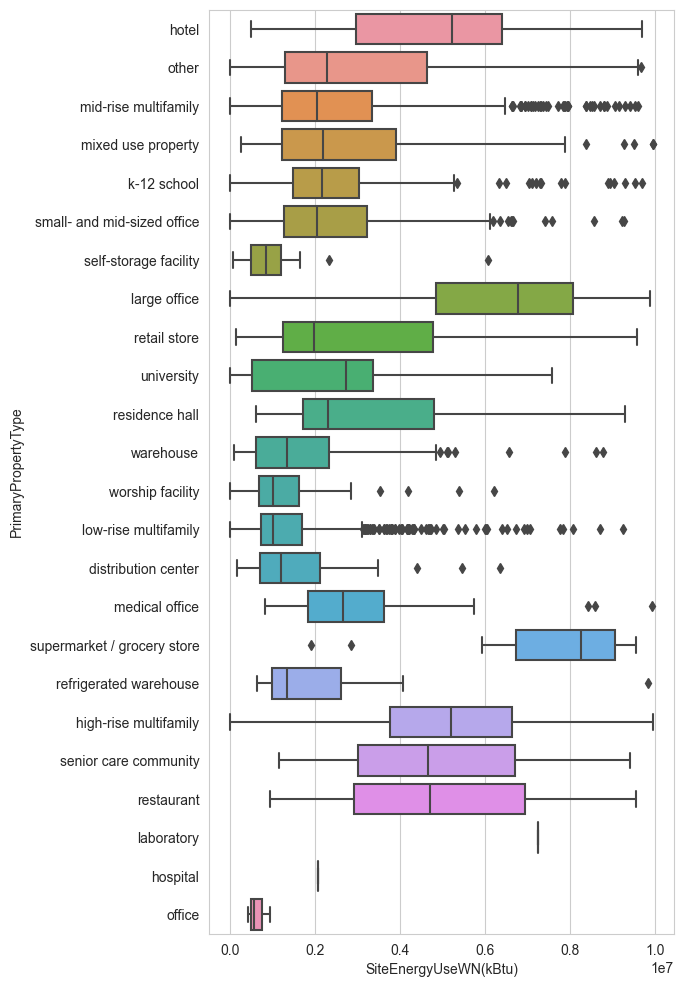

In [272]:
list_var_mod=["BuildingType","PrimaryPropertyType"]

for mod in list_var_mod:
    plt.figure(figsize = (6,12))
    sns.boxplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000], x="SiteEnergyUseWN(kBtu)",y=mod)

## 1.6) Consommation d'énergie en fonction du lieu géographique

Le DF est composé de 5 variables géographiques:
1. Latitude
2. Longitude
3. ZipCode
4. CouncilDistrictCode
5. Neighborhood

<AxesSubplot: xlabel='Latitude', ylabel='SiteEnergyUseWN(kBtu)'>

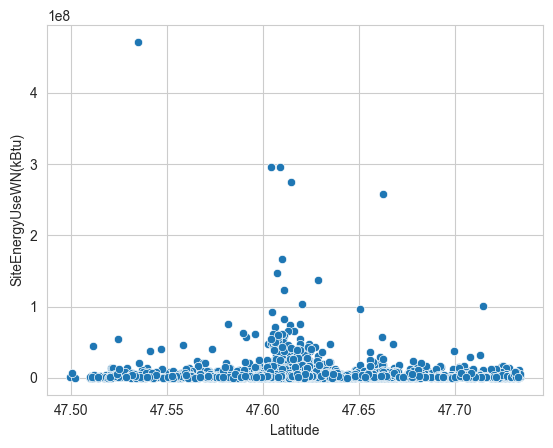

In [273]:
sns.scatterplot(data=df,x="Latitude",y="SiteEnergyUseWN(kBtu)")

<AxesSubplot: xlabel='Longitude', ylabel='SiteEnergyUseWN(kBtu)'>

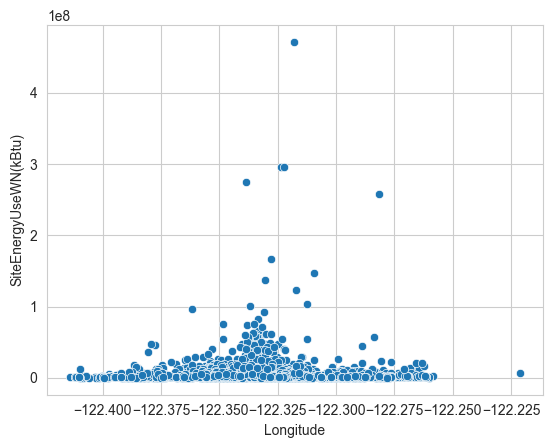

In [274]:
sns.scatterplot(data=df,x="Longitude",y="SiteEnergyUseWN(kBtu)")

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

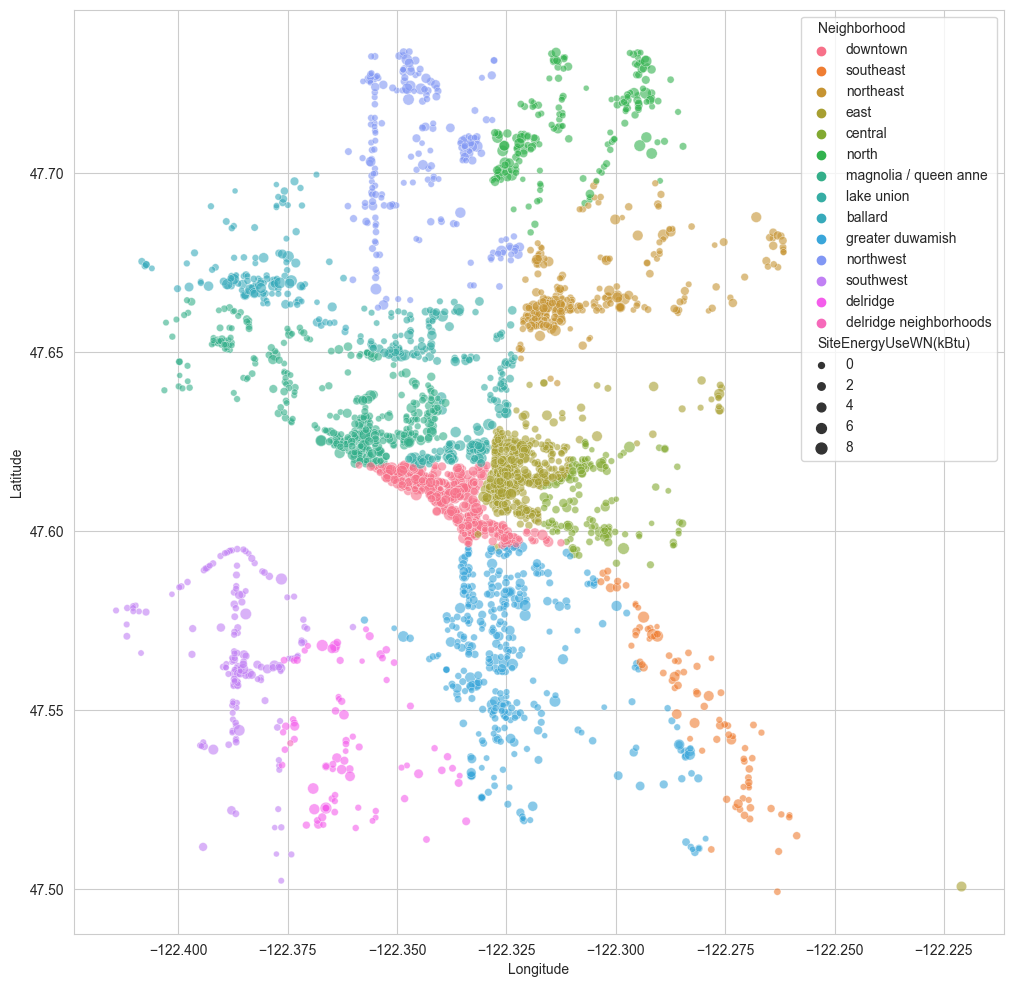

In [275]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000],x="Longitude",y="Latitude",hue="Neighborhood",
                size="SiteEnergyUseWN(kBtu)",alpha=0.6)

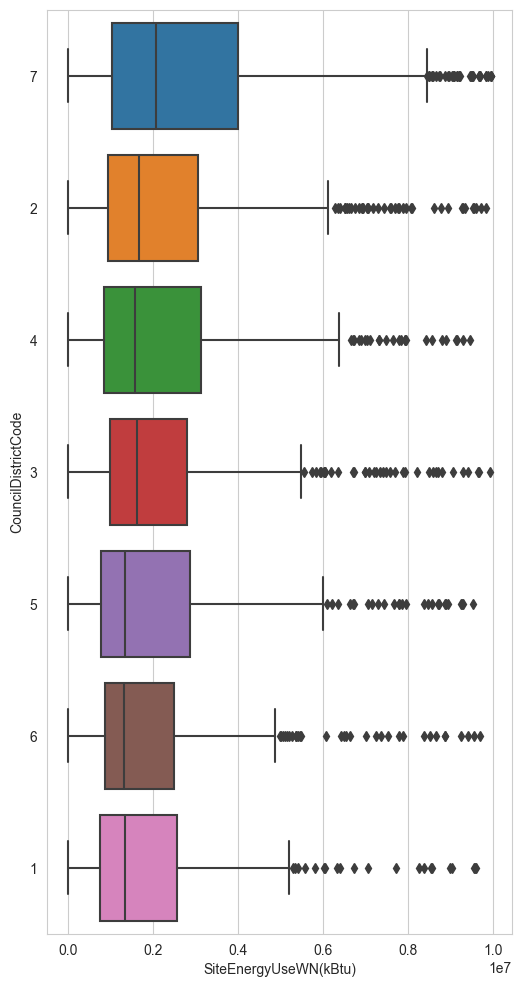

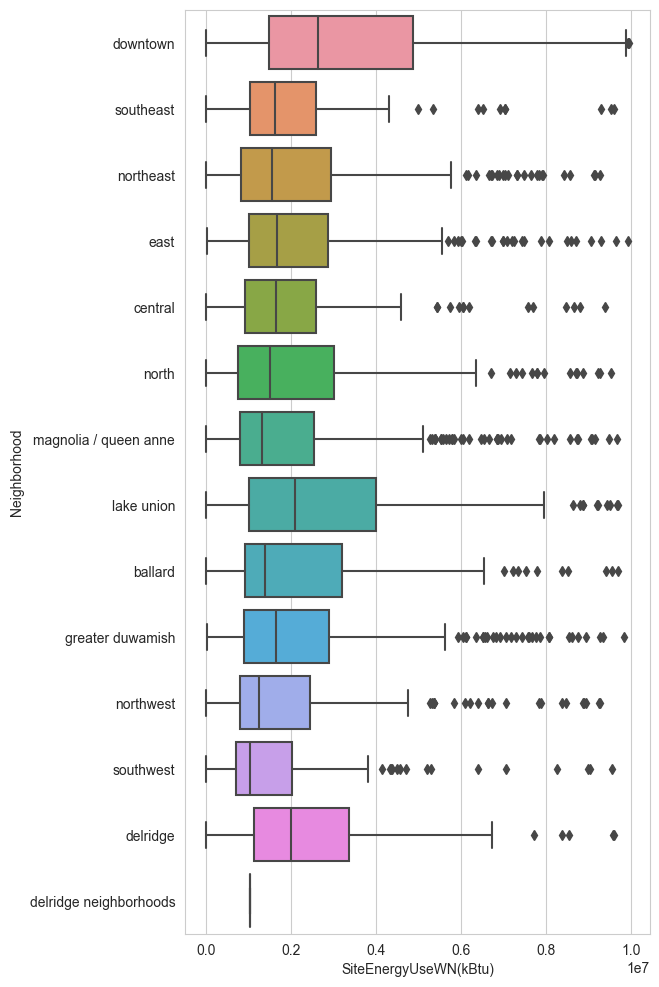

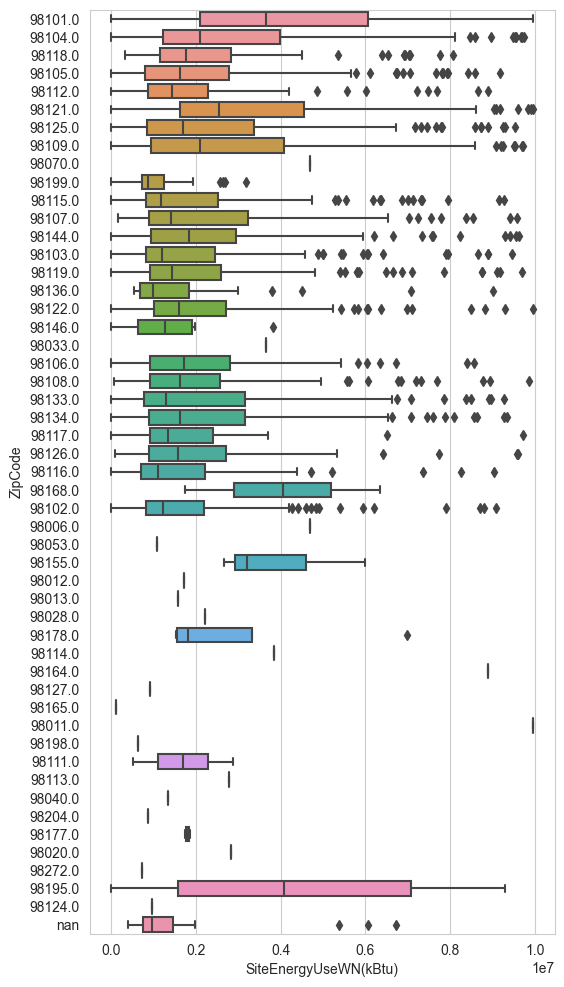

In [276]:
list_var_mod=["CouncilDistrictCode","Neighborhood","ZipCode"]

for mod in list_var_mod:
    plt.figure(figsize = (6,12))
    sns.boxplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000], x="SiteEnergyUseWN(kBtu)",y=mod)

#### 1.7) Colinéarité entre les variables
La consommation totale est la somme de la consommation en électricité et en gaz
La surface totale d'un bien est la somme de chaque partie

In [277]:
# Nombre de lignes par modalités

df_mod = df[["PrimaryPropertyType","Neighborhood","BuildingType"]]

for col in df_mod.columns:
    print(df_mod[col].value_counts())

low-rise multifamily           980
mid-rise multifamily           564
small- and mid-sized office    292
other                          256
warehouse                      187
large office                   173
k-12 school                    139
mixed use property             132
high-rise multifamily          105
retail store                    91
hotel                           77
worship facility                71
distribution center             53
senior care community           45
supermarket / grocery store     40
medical office                  39
self-storage facility           28
university                      25
residence hall                  23
refrigerated warehouse          12
restaurant                      12
hospital                        10
laboratory                      10
office                           3
Name: PrimaryPropertyType, dtype: int64
downtown                  572
east                      452
magnolia / queen anne     422
greater duwamish          375


## Emission de CO2 par la consommation d'énergie

<AxesSubplot: xlabel='TotalGHGEmissions', ylabel='SiteEnergyUseWN(kBtu)'>

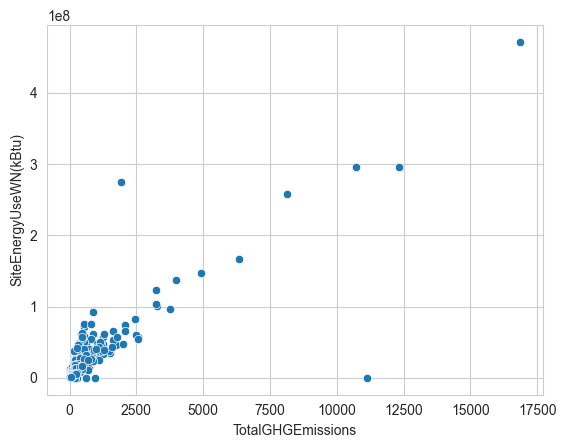

In [278]:
sns.scatterplot(data=df,x="TotalGHGEmissions",y="SiteEnergyUseWN(kBtu)")

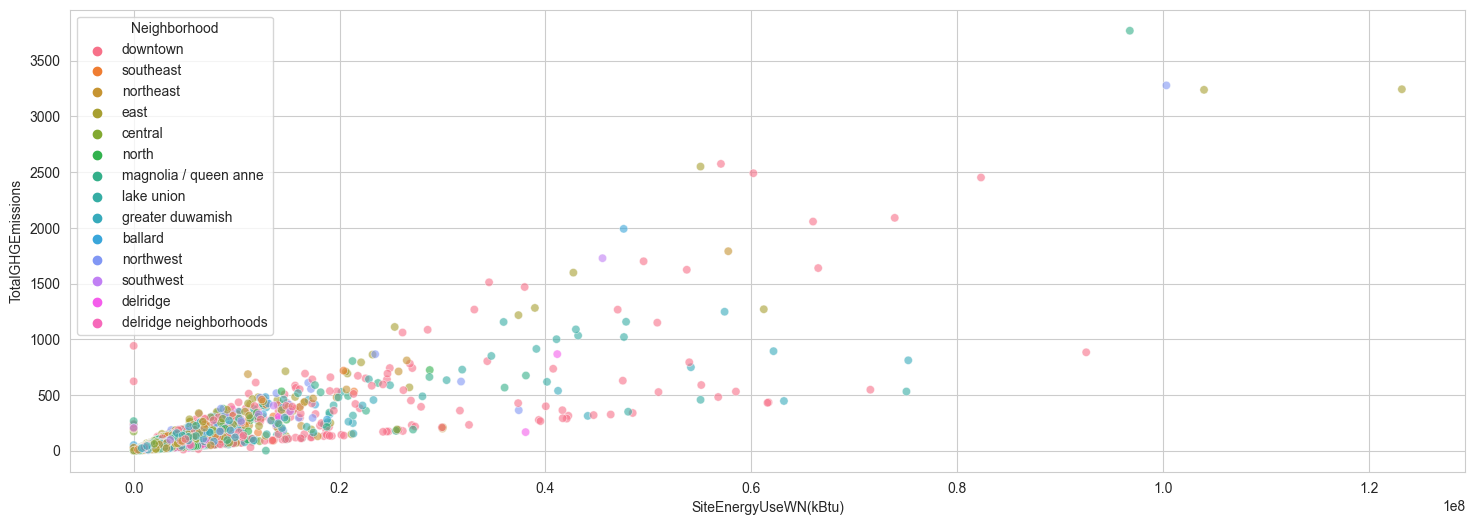

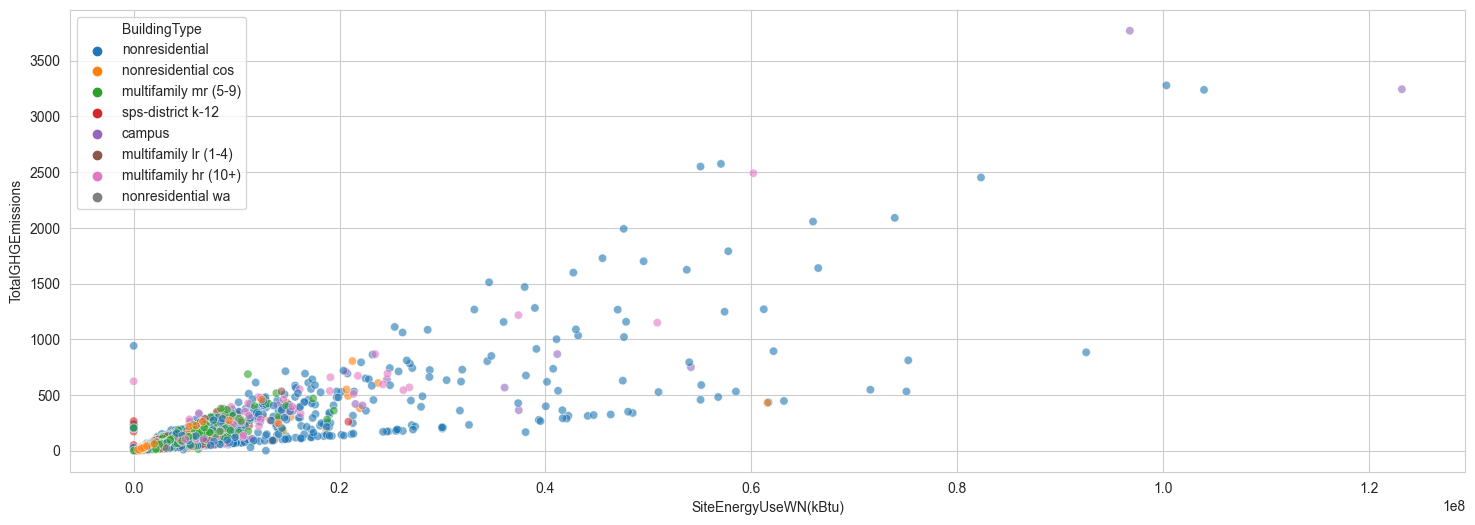

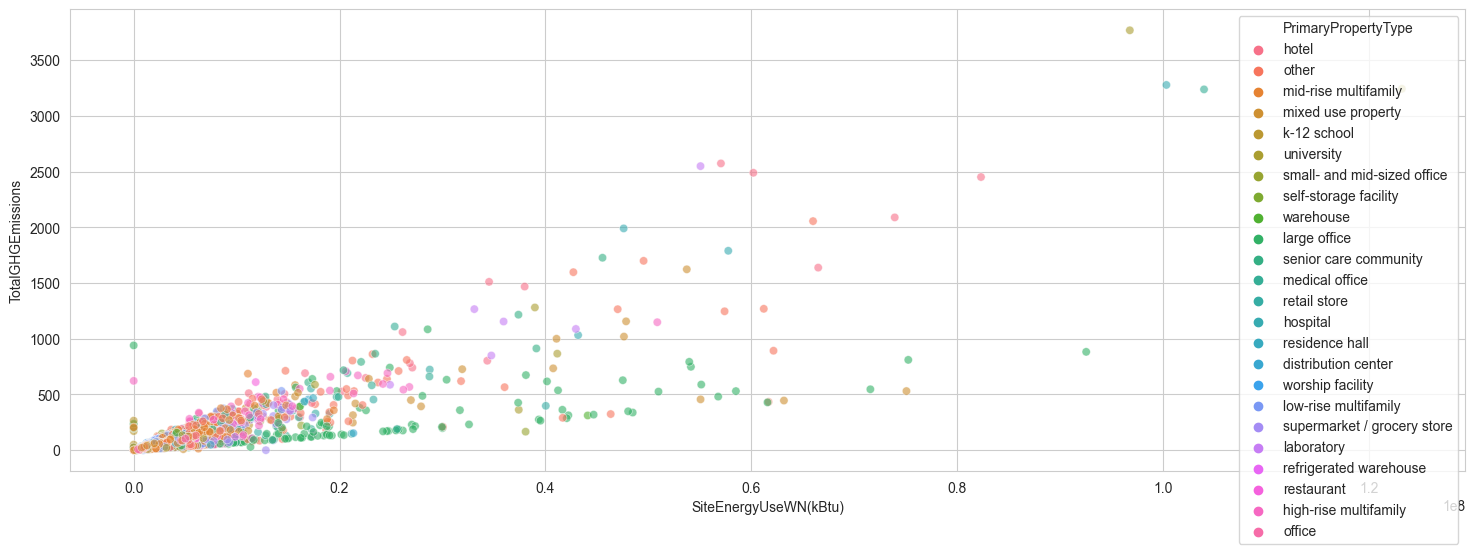

In [279]:
# Consommation d'énergie en fonction de l'émission de CO2

list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]

for mod in list_var_mod:
    plt.figure(figsize = (18,6))
    sns.scatterplot(data=df[(df["TotalGHGEmissions"]<7000)&(df["SiteEnergyUseWN(kBtu)"]<125_500_000)],
                    x="SiteEnergyUseWN(kBtu)",y="TotalGHGEmissions",hue=mod,alpha=0.6)

(3276, 41)

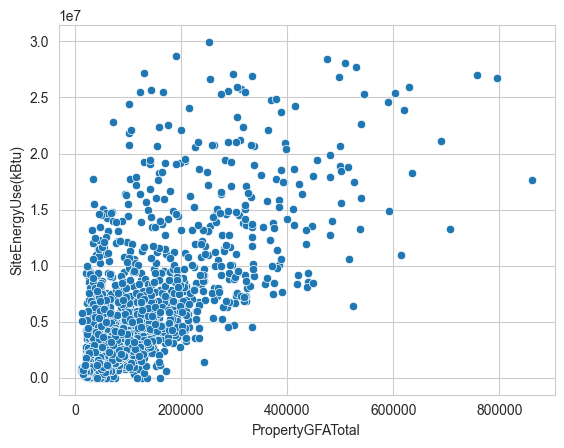

In [280]:
# Consommation d'énergie par taille du bâtiment
sns.scatterplot(data=df[(df["PropertyGFATotal"]<100_0000) & (df["SiteEnergyUse(kBtu)"]<30_000_000)],x="PropertyGFATotal",y="SiteEnergyUse(kBtu)")
df[(df["PropertyGFATotal"]<100_0000) & (df["SiteEnergyUse(kBtu)"]<30_000_000)].shape

## Matrice des corrélations

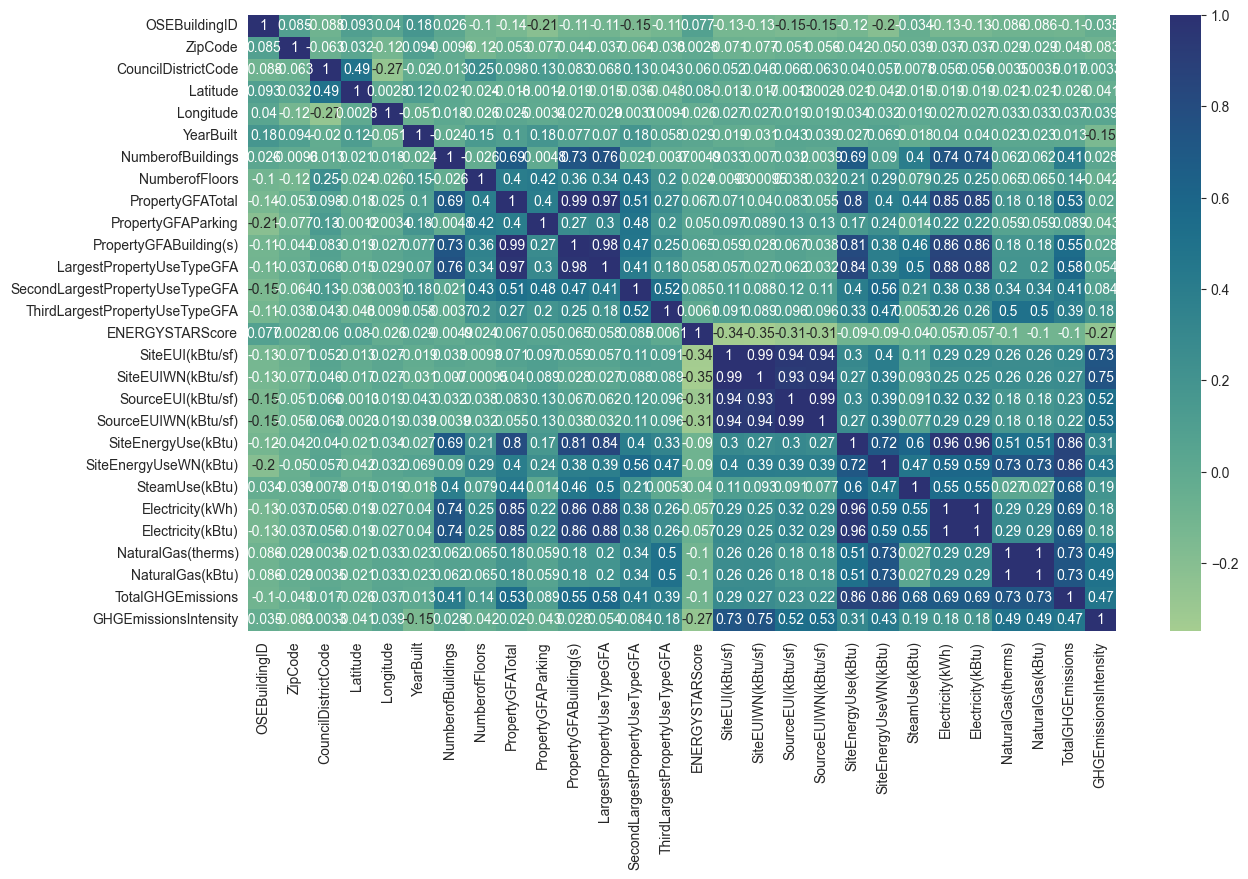

In [281]:
# Matrice de corrélation & heatmap

df_corr = df_float.corr(method='pearson')
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True,cmap="crest")
plt.show()

## 1.8) Création des DF pour le Machine Learning

In [282]:
# Remplacement des valeurs nulles par 0

df['SecondLargestPropertyUseTypeGFA'] = df['SecondLargestPropertyUseTypeGFA'].fillna(0)
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [283]:
df_float = df[["years","NumberofFloors","NumberofBuildings","PropertyGFATotal","SecondLargestPropertyUseTypeGFA",
               "ThirdLargestPropertyUseTypeGFA"]]
df_float

,years,NumberofFloors,NumberofBuildings,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,89,12,1.0,88434,0.0,0.0
1,20,11,1.0,103566,15064.0,4622.0
2,47,41,1.0,956110,0.0,0.0
3,90,10,1.0,61320,0.0,0.0
4,36,18,1.0,175580,68009.0,0.0
...,...,...,...,...,...,...
3371,26,1,1.0,12294,0.0,0.0
3372,12,1,1.0,16000,0.0,0.0
3373,42,1,1.0,13157,5574.0,0.0
3374,27,1,1.0,14101,6501.0,484.0


In [284]:
df_objet=df_objet.drop(columns=["PropertyName","Address","TaxParcelIdentificationNumber",
                                "ListOfAllPropertyUseTypes","ComplianceStatus","SecondLargestPropertyUseType",
                                "ThirdLargestPropertyUseType","LargestPropertyUseType"])
df_objet

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood
0,nonresidential,hotel,98101.0,7,downtown
1,nonresidential,hotel,98101.0,7,downtown
2,nonresidential,hotel,98101.0,7,downtown
3,nonresidential,hotel,98101.0,7,downtown
4,nonresidential,hotel,98121.0,7,downtown
...,...,...,...,...,...
3371,nonresidential cos,office,nan,2,greater duwamish
3372,nonresidential cos,other,nan,2,downtown
3373,nonresidential cos,other,nan,7,magnolia / queen anne
3374,nonresidential cos,mixed use property,nan,1,greater duwamish


In [285]:
df["LargestPropertyUseType"].unique()

array(['hotel', 'police station', 'other - entertainment/public assembly',
       'multifamily housing', 'library', 'fitness center/health club/gym',
       'social/meeting hall', 'courthouse', 'other', 'k-12 school',
       'college/university', 'automobile dealership', 'office',
       'self-storage facility', 'non-refrigerated warehouse',
       'other - mall', 'senior care community', 'medical office',
       'retail store', 'hospital (general medical & surgical)', 'museum',
       'repair services (vehicle, shoe, locksmith, etc)',
       'other - lodging/residential', 'residence hall/dormitory',
       'other/specialty hospital', 'financial office',
       'distribution center', 'parking', 'worship facility', 'restaurant',
       'data center', 'laboratory', 'supermarket/grocery store',
       'convention center', 'urgent care/clinic/other outpatient', nan,
       'other - services', 'strip mall', 'wholesale club/supercenter',
       'refrigerated warehouse', 'manufacturing/indust

In [286]:
df_objet.isnull().sum()

BuildingType           0
PrimaryPropertyType    0
ZipCode                0
CouncilDistrictCode    0
Neighborhood           0
dtype: int64

In [287]:
df_float.isnull().sum()

years                              0
NumberofFloors                     0
NumberofBuildings                  0
PropertyGFATotal                   0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
dtype: int64

## Transformation des variables catégorielles en variables numériques

> Nous utilisons l'encoder de Scikit-Learn pour transformer les six variables catégorielles en variables numériques.
Avec cette méthode les catégories d'une variables n'ont plus de sens, on s'intéresse à l'effet globale de la variable sur la target.

In [288]:
# Vérification du nombre de ligne de chaque DF
print(df_float.shape,df_objet.shape)

(3367, 6) (3367, 5)


In [289]:
# Création du LabelEncoder

le = preprocessing.LabelEncoder()

new_var=["BulType","PPT","Zip","Council","Voisin"]

for col,var in zip(df_objet.columns,new_var):
    le.fit(df_objet[col])
    liste = le.transform(df_objet[col])
    df_float[var] = liste

C:\Users\fbbou\AppData\Local\Temp\ipykernel_12724\4113241864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float[var] = liste
C:\Users\fbbou\AppData\Local\Temp\ipykernel_12724\4113241864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float[var] = liste
C:\Users\fbbou\AppData\Local\Temp\ipykernel_12724\4113241864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [293]:
df_float["NumberofBuildings"].value_counts()

1.0      3174
0.0        92
2.0        37
3.0        22
4.0        12
5.0        10
6.0         5
8.0         3
10.0        2
14.0        2
9.0         2
7.0         1
11.0        1
16.0        1
23.0        1
27.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

In [294]:
df_float["NumberofFloors"].value_counts()

3     690
4     686
1     466
2     438
6     306
5     295
7     148
8      64
10     32
11     32
12     21
13     21
9      18
0      16
14     13
17      9
16      7
24      7
18      7
15      7
23      7
19      6
26      6
42      6
33      6
20      5
27      5
21      5
25      5
22      4
29      3
41      3
37      2
34      2
31      2
36      2
28      2
32      1
39      1
76      1
38      1
99      1
55      1
56      1
30      1
46      1
63      1
49      1
47      1
40      1
Name: NumberofFloors, dtype: int64

In [291]:
# DF contenant toutes les variables qui vont être utilisées
df_float

,years,NumberofFloors,NumberofBuildings,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,BulType,PPT,Zip,Council,Voisin
0,89,12,1.0,88434,0.0,0.0,4,3,10,6,4
1,20,11,1.0,103566,15064.0,4622.0,4,3,10,6,4
2,47,41,1.0,956110,0.0,0.0,4,3,10,6,4
3,90,10,1.0,61320,0.0,0.0,4,3,10,6,4
4,36,18,1.0,175580,68009.0,0.0,4,3,28,6,4
...,...,...,...,...,...,...,...,...,...,...,...
3371,26,1,1.0,12294,0.0,0.0,5,11,55,1,6
3372,12,1,1.0,16000,0.0,0.0,5,12,55,1,4
3373,42,1,1.0,13157,5574.0,0.0,5,12,55,6,8
3374,27,1,1.0,14101,6501.0,484.0,5,10,55,0,6


In [292]:
df_float.to_csv("df_float.csv",sep=";")
df_objet.to_csv("df_objet.csv",sep=";")
df.to_csv("df.csv",sep=";")

>Nous utilisons deux Notebooks différents :
>1) Prédiction du la consommation en energie (par bat)
>2) Prédiction de l'emmission de  CO2 (par bat)